In [1]:
import sys
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import warnings
import os

# set the parent directory to 2 directories up
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.append(parent_dir)
pd.set_option('display.max_columns', None)

warnings.filterwarnings("ignore")

In [2]:
BASEPATH = parent_dir + "/data_processed/suitability_scores/"

# Load county level suitability data
suitability_county = pd.read_csv(BASEPATH + "county_suitability_scores.csv", dtype={"GEOID": str})

# Load block group data
suitability_block_group = pd.read_csv(BASEPATH + "block_group_suitability_scores.csv", dtype={"GEOID": str})

# Load Project suitability data
project_suitability = pd.read_csv(BASEPATH + "project_suitability_scores.csv", dtype={"GEOID": str}).drop(columns=["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"])
factors = ['GHI', 'Protected_Land', 'Habitat', 'Slope', 'Population_Density', 'Distance_to_Substation', 'Land_Cover']

# Histograms of factors

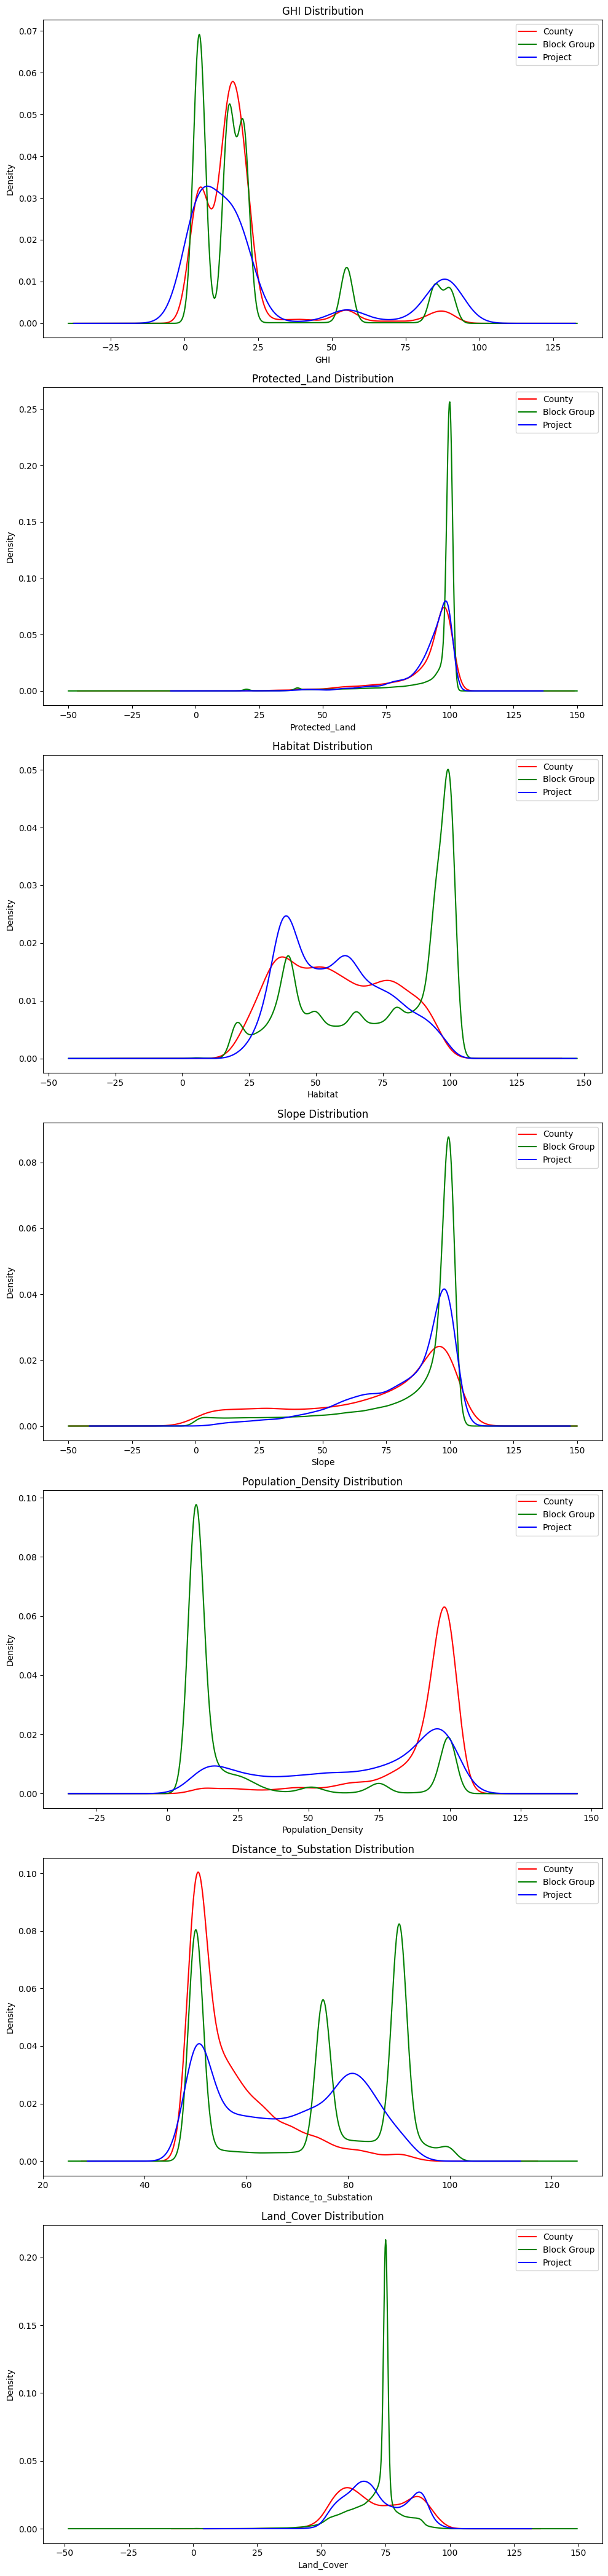

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(factors), figsize=(10, 6 * len(factors)))

# Ensure axes is iterable even for a single factor
if len(factors) == 1:
    axes = [axes]

for ax, factor in zip(axes, factors):
    county_factor = suitability_county[[factor]]
    bg_factor = suitability_block_group[[factor]]
    project_factor = project_suitability[[factor]]

    # Plot KDE
    county_factor.plot(kind='kde', ax=ax, label='County', color='red')
    bg_factor.plot(kind='kde', ax=ax, label='Block Group', color='green')
    project_factor.plot(kind='kde', ax=ax, label='Project', color='blue')

    ax.set_xlabel(factor)
    ax.set_ylabel('Density')
    ax.set_title(f'{factor} Distribution')
    ax.legend(['County', 'Block Group', 'Project'])

plt.tight_layout()
plt.show()
